# Pymaceuticals Inc.
---

### Analysis
The main insight that can be gleaned from this datast is tht Ramicane is the most effective drug at reducing tumor volume, as it had the lowest mean/median, as well as the smallest variance. Another insight is that there was a large variability in number of mouse timepoints between the drugs, with Capomulin and Ramicane having significantly more timepoints than the lower measured drugs. This may have been due to those two drugs having the lowest overall tumor volume by mean. A third insight into the data is that mouse weight is positively correlated with tumor volume, with a correlation value of 0.84.

In [272]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata, how='outer', on="Mouse ID")

# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [273]:
# Checking the number of mice.
mouse_number = len(mouse_study['Mouse ID'].unique())
mouse_number

249

In [274]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_data = mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint']) == True]
dupe_id = duplicated_data['Mouse ID'].unique()
dupe_id[0]

'g989'

In [275]:
# Optional: Get all the data for the duplicate mouse ID.
all_dupes = mouse_study[mouse_study['Mouse ID'] == dupe_id[0]]
all_dupes

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [276]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_cleaned = mouse_study.drop(mouse_study[mouse_study['Mouse ID'] == 'g989'].index)
mouse_study_cleaned.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [277]:
# Checking the number of mice in the clean DataFrame.
mouse_number_cleaned = len(mouse_study_cleaned['Mouse ID'].unique())
mouse_number_cleaned



248

## Summary Statistics

In [278]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


drug_mean = mouse_study_cleaned.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
drug_median = mouse_study_cleaned.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
drug_variance = mouse_study_cleaned.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
drug_std = mouse_study_cleaned.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
drug_se = mouse_study_cleaned.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

study_stats = pd.DataFrame({
    'Mean Tumor Volume': drug_mean,
    'Median Tumor Volume': drug_median,
    'Tumor Volume Variance': drug_variance,
    'Tumor Colume Std. Dev.': drug_std,
    'Tumor Volume Std. Err.':drug_se  
})
study_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Colume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [279]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
study_stats = mouse_study_cleaned.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
study_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

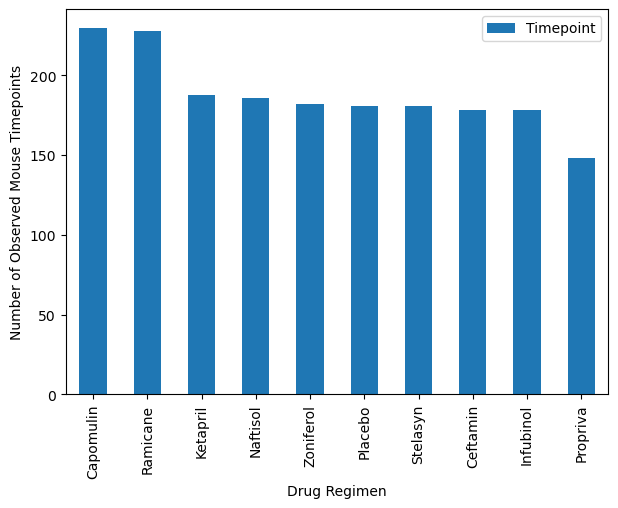

<Figure size 640x480 with 0 Axes>

In [280]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = (mouse_study_cleaned.groupby(['Drug Regimen'])['Timepoint'].count()).to_frame()
drug_counts = drug_counts.sort_values(by='Timepoint', ascending=False)
drug_counts_chart = drug_counts.plot(kind='bar', figsize=(7,5))

# Set the xlabel and ylabel using class methods
drug_counts_chart.set_xlabel("Drug Regimen")
drug_counts_chart.set_ylabel("Number of Observed Mouse Timepoints")

plt.show()
plt.tight_layout()

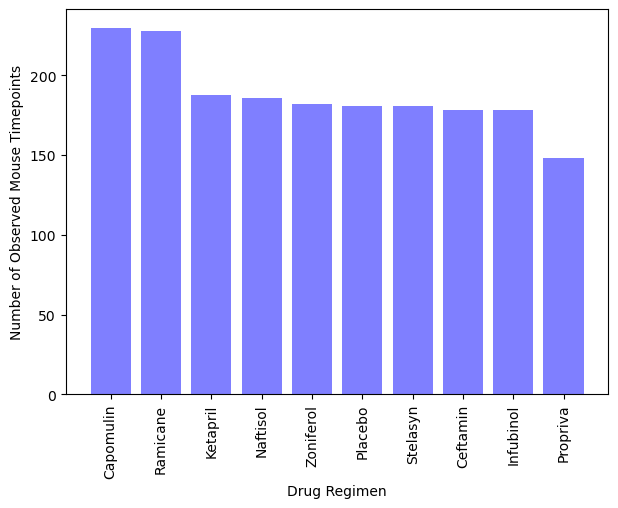

In [281]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(drug_counts))
tick_locations = [value for value in x_axis]


drug_ticks = list(drug_counts.index.values)


plt.figure(figsize=(7,5))
plt.bar(x_axis, drug_counts['Timepoint'], color='blue', alpha=0.5, align="center")
plt.xticks(tick_locations, drug_ticks, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.show()

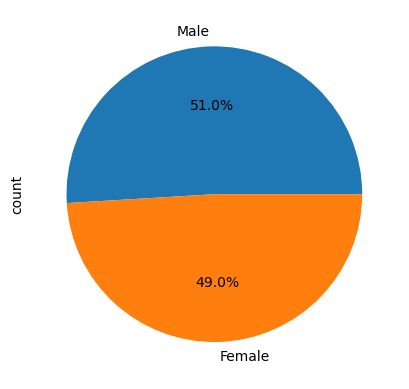

In [282]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data = mouse_study_cleaned["Sex"].value_counts()
sex_data.plot.pie(autopct= "%1.1f%%")
plt.show()

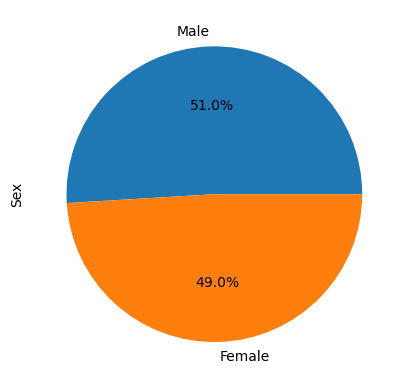

In [283]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_count = mouse_study_cleaned[mouse_study_cleaned['Sex'] == 'Male']['Sex'].count()
female_count = mouse_study_cleaned[mouse_study_cleaned['Sex'] == 'Female']['Sex'].count()

plt.pie([male_count, female_count],labels=['Male', 'Female'],autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [284]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
boxplot_tumor = []
    
for drug in drugs:    
    capomulin_only = mouse_study_cleaned.loc[mouse_study_cleaned["Drug Regimen"] == drug]
    cap_time_final = pd.DataFrame(capomulin_only.groupby('Mouse ID')['Timepoint'].max())
    cap_final = pd.merge(cap_time_final, mouse_study_cleaned, on=("Mouse ID","Timepoint"),how="left")
    cap_final_vol = cap_final['Tumor Volume (mm3)']    
    boxplot_tumor.append(cap_final_vol)
  
    quartiles = cap_final_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of {drug} tumors is: {lowerq}")
    print(f"The upper quartile of {drug} tumors is: {upperq}")
    print(f"The interquartile range of {drug} tumors is: {iqr}")
    print(f"The the median of {drugs} tumors is: {quartiles[0.5]} ")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
   
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f"                                             ")

The lower quartile of Capomulin tumors is: 32.37735684
The upper quartile of Capomulin tumors is: 40.1592203
The interquartile range of Capomulin tumors is: 7.781863460000004
The the median of ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] tumors is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
                                             
The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The the median of ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
                                             
The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The the m

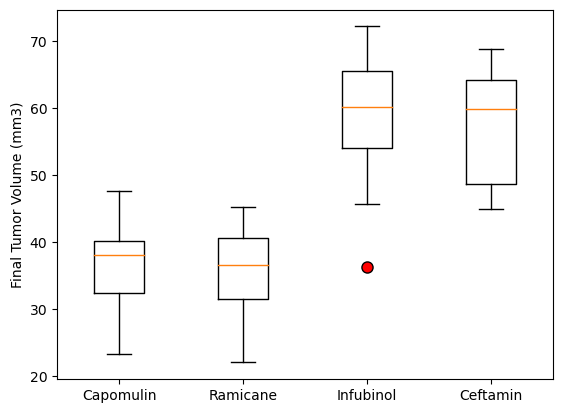

In [285]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Regimen = drugs
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(boxplot_tumor, labels=Regimen, widths = 0.4, vert=True,flierprops={'marker': 'o', 'markersize': 8, 'markerfacecolor': 'red'})
plt.show()

## Line and Scatter Plots

<Axes: title={'center': 'Capomulin Treatment of Mouse l509'}, xlabel='Timepoint (days)', ylabel='Tumor Volume (mm3)'>

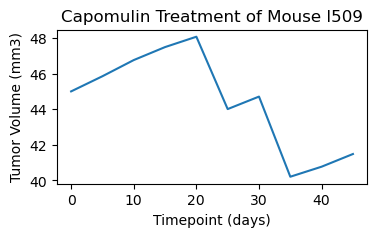

In [286]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_ex = mouse_study[mouse_study['Mouse ID'] == 'l509']
capomulin_ex = capomulin_ex[['Timepoint','Tumor Volume (mm3)']]
capomulin_ex = capomulin_ex.set_index('Timepoint')


capomulin_ex.plot(kind="line", figsize=(4,2),
                                title='Capomulin Treatment of Mouse l509',
                                xlabel='Timepoint (days)',
                                ylabel='Tumor Volume (mm3)',
                                legend=None)

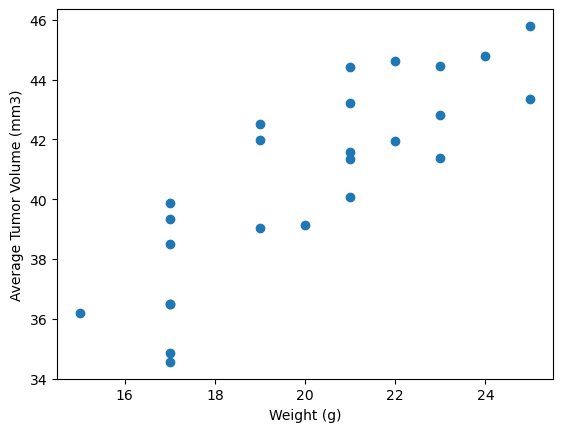

In [287]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#get only capomulin data, group by mouse ID and average each mouse
capomulin_mice = mouse_study_cleaned[mouse_study_cleaned['Drug Regimen'] == 'Capomulin']
capomulin_weights = capomulin_mice.groupby(['Mouse ID'])['Weight (g)'].mean()
capomulin_mean_tumor = capomulin_mice.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()

plt.scatter(capomulin_weights,capomulin_mean_tumor)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


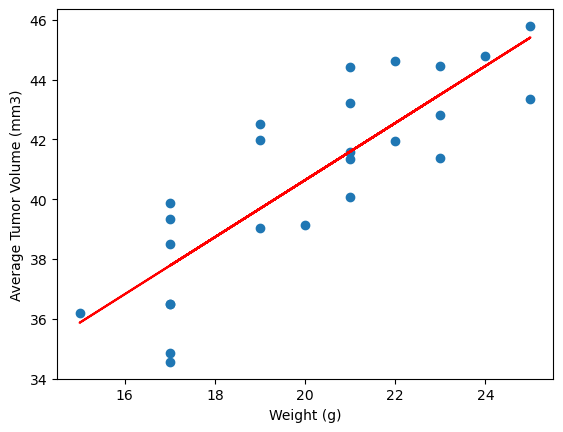

In [264]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(capomulin_weights,capomulin_mean_tumor)
lr_slope, lr_int, lr_r, lr_p, lr_std_err = st.linregress(capomulin_weights, capomulin_mean_tumor)
lr_fit = lr_slope * capomulin_weights + lr_int
plt.plot(capomulin_weights,lr_fit,"r")

plt.scatter(capomulin_weights,capomulin_mean_tumor)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')
plt.show()